[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_cmnd_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Composed Multivariate Normal Distribution (CMND): quickstart

This notebook gives a short introduction to **MultiMin**: fitting and visualizing **Composed Multivariate Normal Distributions (CMND)**.

## Theoretical background

The core of `MultiMin` is the **Composed Multivariate Normal Distribution (CMND)**. The theory behind it posits that any multivariate distribution function $p(\tilde U):\Re^{N}\rightarrow\Re$, where $\tilde U:(u_1,u_2,u_3,\ldots,u_N)$ are random variables, can be approximated with arbitrary precision by a normalized linear combination of $M$ Multivariate Normal Distributions (MND):

$$
p(\tilde U) \approx \mathcal{C}_M(\tilde U; \{w_k\}_M, \{\mu_k\}_M, \{\Sigma_k\}_M) \equiv \sum_{i=1}^{M} w_i\mathcal{N}_k(\tilde U; \tilde \mu_i, \Sigma_i)
$$

where the multivariate normal $\mathcal{N}_k(\tilde U; \tilde \mu, \Sigma)$ with mean vector $\tilde \mu$ and covariance matrix $\Sigma$ is given by:

$$
\mathcal{N}_k(\tilde U; \tilde \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \det \Sigma}} \exp\left[-\frac{1}{2}(\tilde U - \tilde \mu)^{\rm T} \Sigma^{-1} (\tilde U - \tilde \mu)\right]
$$

The covariance matrix $\Sigma$ elements are defined as $\Sigma_{ij} = \rho_{ij}\sigma_{i}\sigma_{j}$, where $\sigma_i$ is the standard deviation of $u_i$ and $\rho_{ij}$ is the correlation coefficient between variable $u_i$ and $u_j$ ($-1<\rho_{ij}<1$, $\rho_{ii}=1$).

The normalization condition on $p(\tilde U)$ implies that the set of weights $\{w_k\}_M$ are also normalized, i.e., $\sum_i w_i=1$.


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "quickstart"

Welcome to MultiMin v0.9.5. ¡Al infinito y más allá!


## Distribution basics

Below we define and visualize CMNDs before using them for fitting.

### Univariate normal distribution

The simplest case is a mixture of univariate normals. Here we create a CMND with two Gaussian components:

In [3]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

We can plot a sample from the distribution:

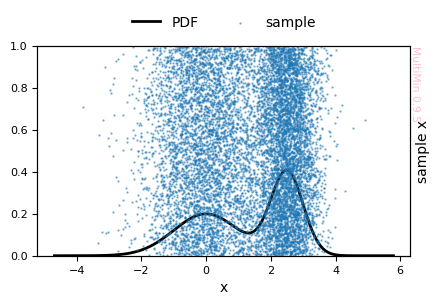

In [4]:
G = CMND.plot_sample(
    properties=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_sample_hist.png')

Or you may specify in a more complex way the features of the properties:

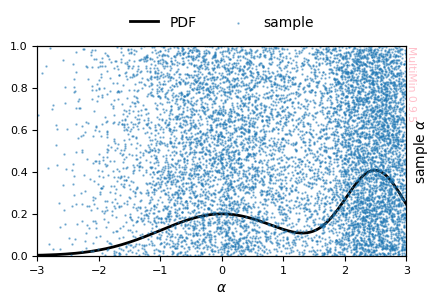

In [5]:
G = CMND.plot_sample(
    properties=dict(x=dict(label=r"$\alpha$", range=[-3,3])),
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_sample_hist.png')

### Multivariate normal distributions

Create a **Composed Multivariate Normal** (CMND) with one component:

In [6]:
CMND=mn.ComposedMultiVariateNormal(ngauss=1,nvars=2)
print(CMND)

Composition of ngauss = 1 gaussian multivariates of nvars = 2 random variables:
    Weights: [1.0]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0]]
    Standard deviations (σ): [[1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,μ1_1,μ1_2,Σ1_11,Σ1_12,Σ1_22]
            [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (6):
            [p1,μ1_1,μ1_2,σ1_1,σ1_2,ρ1_12]
            [1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


Generate a random sample from the CMND:

In [7]:
sample = CMND.rvs(10000)

Plot the sample (2D histograms):

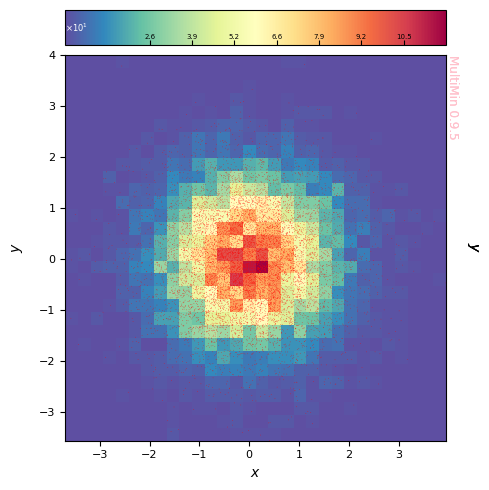

In [8]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=mn.DensityPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig(f'gallery/{figprefix}_2gauss_sample_density.png')


Create a CMND with **multiple** components (e.g. two Gaussians):

You can specify weights, means, and covariance matrices explicitly:

In [9]:
weights=[0.1,0.9]
mus=[[0,0],[5,5]]
Sigmas=[[[1,0.2],[0,1]],[[1,0],[0,1]]]
MND=mn.ComposedMultiVariateNormal(mus=mus,weights=weights,Sigmas=Sigmas)
print(MND)

Composition of ngauss = 2 gaussian multivariates of nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


Or use a flat parameter list (weights, mus, sigmas, correlations):

In [10]:
params=[0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
MND=mn.ComposedMultiVariateNormal(params=params,nvars=2)
print(MND)

Composition of ngauss = 2 gaussian multivariates of nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


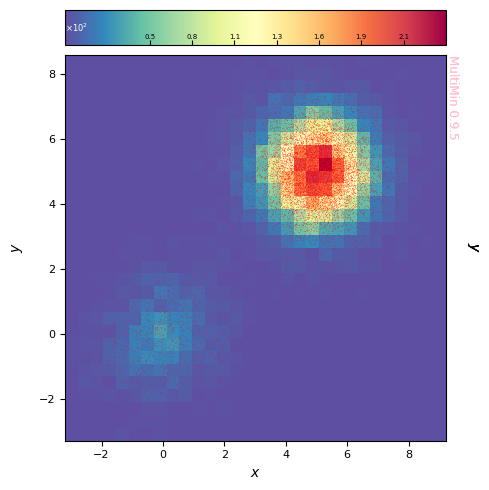

In [11]:
sample = MND.rvs(10000)
G=mn.DensityPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig(f'gallery/{figprefix}_1gauss_sample_density.png')


---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga